This code demonstrates how to view time series data with pandas and various methods of sampling, smoothing (rolling mean), and applying linear regression to the data. 


<h3 align='Left'> Importing Libraries</h3>

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

<h3 align='Left'> Getting Data and Viewing with Pandas </h3>

In [2]:
#Investors Exchange (IEX)
iex = web.DataReader('F', data_source = 'iex', start = '3/14/2014', end = '4/14/2018')
iex = iex.drop('volume', axis = 1 )
iex.head()

,open,high,low,close
date,,,,
2014-03-14,11.7692,11.8235,11.6762,11.6917
2014-03-17,11.7692,11.8855,11.7537,11.8468
2014-03-18,11.8545,12.0716,11.8468,12.0096
2014-03-19,12.0251,12.0561,11.9010,12.0018
2014-03-20,11.9786,12.0561,11.9166,12.0561


In [3]:
iex.shape

(1029, 4)

<h3 align='Left'> Adding Column </h3>

In [4]:
iex['ticks'] = range(0,len(iex.index.values))

In [5]:
iex.head()

,open,high,low,close,ticks
date,,,,,
2014-03-14,11.7692,11.8235,11.6762,11.6917,0
2014-03-17,11.7692,11.8855,11.7537,11.8468,1
2014-03-18,11.8545,12.0716,11.8468,12.0096,2
2014-03-19,12.0251,12.0561,11.9010,12.0018,3
2014-03-20,11.9786,12.0561,11.9166,12.0561,4


<h3 align='Left'> Plotting Ticks vs Open Price</h3>

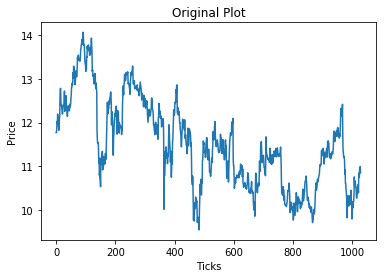

In [6]:
#very simple plotting
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Ticks')
ax1.set_ylabel('Price')
ax1.set_title('Original Plot')
ax1.plot('ticks', 'open', data = iex);

<h3 align='Left'> Sampling 1/10th of the Data</h3>

In [7]:
one_tenth = iex.sample(frac = .1, random_state=np.random.randint(10))

In [8]:
one_tenth.head()

,open,high,low,close,ticks
date,,,,,
2017-12-15,11.6821,11.8127,11.6634,11.7380,948
2016-11-22,10.3916,10.5242,10.3651,10.5065,680
2017-12-29,11.7380,11.7660,11.6541,11.6541,957
2016-05-26,11.7323,11.8100,11.5424,11.6201,555
2014-11-20,12.2035,12.4258,12.1320,12.2749,175


<h3 align='Left'>Reordering Data by Ticks Value</h3>

In [9]:
# removing index name
one_tenth.index.name = None
one_tenth = one_tenth.sort_values(by=['ticks'], ascending=[True])
one_tenth.head()

,open,high,low,close,ticks
2014-04-23,12.4670,12.6531,12.4670,12.5833,27
2014-04-24,12.7229,12.7461,12.5601,12.6531,28
2014-06-05,13.1427,13.1974,12.9708,13.0333,57
2014-06-06,13.0255,13.3458,13.0255,13.3458,58
2014-06-17,12.9551,13.1270,12.9161,13.1192,65


<h3 align='Left'> Plotting Ticks vs Open Price on Sampled Data</h3>

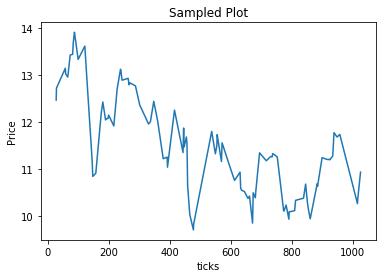

In [10]:
axes = one_tenth.plot(x='ticks', y='open', legend = False, title = 'Sampled Plot');
axes.legend = None;
axes.set_ylabel('Price');

<h3 align='Left'> Plotting Original Data vs Sampled Data (Subplot)</h3>

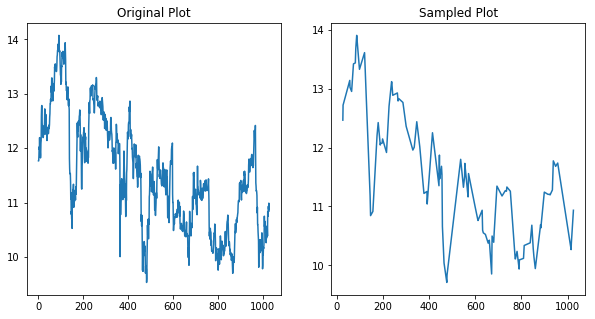

In [11]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (10,5));
axes[0].plot('ticks', 'open', data = iex);
axes[0].set_title('Original Plot');
axes[1].plot('ticks', 'open', data = one_tenth);
axes[1].set_title('Sampled Plot');

<h3 align='Left'> Change the Index From Date to Ticks</h3>

In [12]:
#google.index = google['Ticks']
# Removing Index
iex = iex.reset_index()
iex.head(3)

,date,open,high,low,close,ticks
0,2014-03-14,11.7692,11.8235,11.6762,11.6917,0
1,2014-03-17,11.7692,11.8855,11.7537,11.8468,1
2,2014-03-18,11.8545,12.0716,11.8468,12.0096,2


<h3 align='Left'> Plotting Original Data vs Sampled vs Rolling Mean Plot (Subplot)</h3>

In [13]:
# documentation: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html
iex['Rolling_Mean'] = iex['open'].rolling(window = 80).mean()

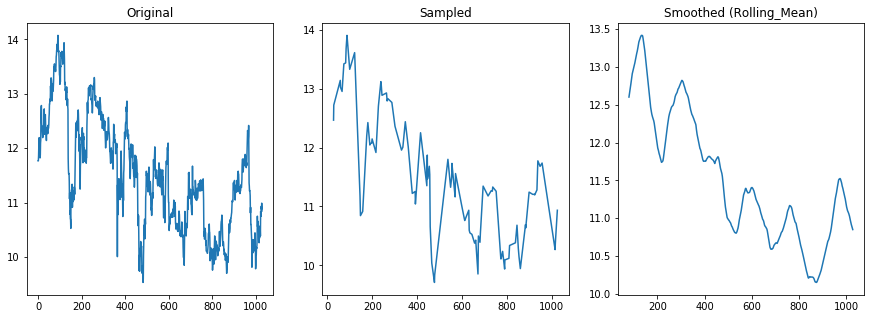

In [14]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5));
axes[0].plot('ticks', 'open', data = iex);
axes[0].set_title('Original');
axes[1].plot('ticks', 'open', data = one_tenth);
axes[1].set_title('Sampled');
axes[2].plot('ticks', 'Rolling_Mean', data = iex);
axes[2].set_title('Smoothed (Rolling_Mean)');

<h3 align='Left'>Plotting Original Data and Smoothed Data on Same Plot</h3>

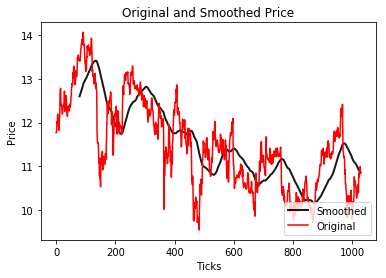

In [15]:
fig = plt.figure();
ax = fig.add_subplot(111);
ax.plot(iex['ticks'], iex['Rolling_Mean'], color = (0,0,0), linewidth = 2, alpha = .9, label = 'Smoothed');
ax.plot(iex['ticks'], iex['open'], color = (1,0,0), label = 'Original');
ax.set_title('Original and Smoothed Price')
ax.set_xlabel('Ticks')
ax.set_ylabel('Price')
ax.legend(loc='lower right');

<h3 align='Left'>Getting Data Only from Tick 800 to 1200</h3>

In [16]:
filt_iex = iex[(iex['ticks'] >= 800) & (iex['ticks'] <= 1200)]

In [17]:
filt_iex.head()

,date,open,high,low,close,ticks,Rolling_Mean
800,2017-05-17,9.9002,9.9639,9.7091,9.7910,800,10.751050
801,2017-05-18,9.7637,9.8456,9.7364,9.8183,801,10.734493
802,2017-05-19,9.8365,9.9548,9.8183,9.8911,802,10.714804
803,2017-05-22,10.1094,10.1276,9.9912,10.1003,803,10.699200
804,2017-05-23,10.1549,10.1595,9.9821,10.0549,804,10.686073
